# Instrument recognition


## `Import packages & mount google drive`

In [1]:
import os       # For path-manipulations etc

import librosa  # For all kinds of audio manipulations
from librosa import display

from IPython.display import Audio #to play audio inside the notebook

import numpy as np
import scipy
import matplotlib.pyplot as plt

In [3]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Import data

In [4]:
def import_data(data_dir, ins_annotations, max_songs_per_annotation = None):
  """
  Imports the data.

  Parameters
  ----------

  data_dir : string
    Path of the directory that contains the data. It is assumed that 
    this directory contains subdirectories, whose titles are given by
    the annotations of the various instruments. The actual sound-files 
    are inside these subfolders.

  ins_annotations : array of strings
    List of the annotations of the various annotations - these strings 
    also the names of the subfolders that contain the data with that 
    annotation.

  max_songs_per_annotations : int, optional
    Maximum number of songs to include per annotation. Useful to test my code
    while working only a smaller dataset.
  Returns
  -------

  sample_rates : np.array of ints
    List of the sample-rates (in Hz) of all the music-files

  data : list of np.arrays
    List of time-domain data (in np.array format) of all music snippets.

  classifications : np.array of strings
    List of the annotation for every song - the annotation is for
    the predominant instrument.

  """

  # Initalize the to-be-returned np.arrays
  sample_rates = [] #note: I'm choosing this to be a list, not a np.arrary.
                    #The reaons is not very good -  but it seems easier to 
                    # append integers to a list. 
                    # If I were to intiialize sample_rates as a np.array, 
                    # every entry of sample_rates is automatically treated
                    # as float64..
  data = [] # note: its type is list, not np.array, because the data-signals 
            # it contains may - in principle - be of different length
  classifications = np.array([])

  # Import
  for annotation in ins_annotations:

    print(f"Importing data with annotation '{annotation}'")
    data_subdir = os.path.join(data_dir,annotation)

    for filename in os.listdir(data_subdir)[:max_songs_per_annotation]:

      dt, sr = librosa.load( os.path.join(data_subdir,filename), sr = None, mono = False )

      data.append(dt)
      sample_rates.append( int(sr) )
      classifications = np.append(classifications,annotation)

  return sample_rates, data, classifications

In [5]:
# Set working directory for this project
base_dir = '/content/drive/My Drive/Colab Notebooks/instrument_recognition'
os.chdir(base_dir)

# Data directory:
data_dir = os.path.join(base_dir,'data','IRMAS','trainingdata')
# List of the strings used as instrument annotations
ins_annotations = ['cel','cla','flu','gac','gel','org','pia','sax','tru','vio','voi']

#Import data
sample_rates, data, classifications = import_data(data_dir, ins_annotations, max_songs_per_annotation = 5)

Importing data with annotation 'cel'
Importing data with annotation 'cla'
Importing data with annotation 'flu'
Importing data with annotation 'gac'
Importing data with annotation 'gel'
Importing data with annotation 'org'
Importing data with annotation 'pia'
Importing data with annotation 'sax'
Importing data with annotation 'tru'
Importing data with annotation 'vio'
Importing data with annotation 'voi'


## Preprocessing

## Illustration of the data: time-signal of a single snippet

In [7]:
# As an example, let's hear & plot the time-signal of the snippet 'i'.
i = 13

## First, let's hear it!
Audio(data[i],rate = sample_rates[i])

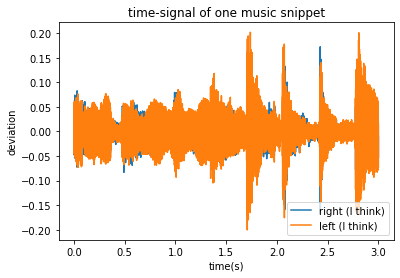

In [8]:
## Second, let's plot it!

timerange = np.arange(0,len(data[i][0])) / float( sample_rates[i] )

plt.figure()
plt.plot(timerange, data[i][1])
plt.plot(timerange, data[i][0])
plt.title('time-signal of one music snippet')
plt.xlabel('time(s)')
plt.ylabel('deviation')
plt.legend(['right (I think)','left (I think)'],loc='lower right')

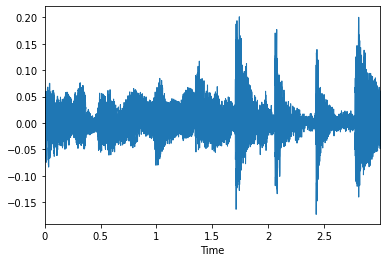

In [9]:
# An alternative way of plotting is with a function that comes with librosa:
librosa.display.waveplot(data[i], sr = sample_rates[i])
# It seems that this displays the stereo-signal by plotting the left signal above
# the y=0-line, and the right signal below it. In other words, it plots both
# |left signal| and -|right signal| in the same color.

## Fourier Transform

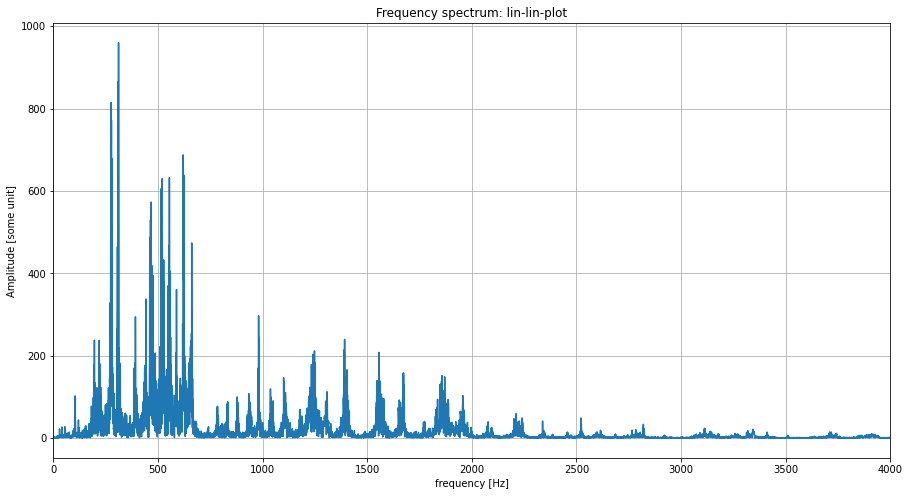

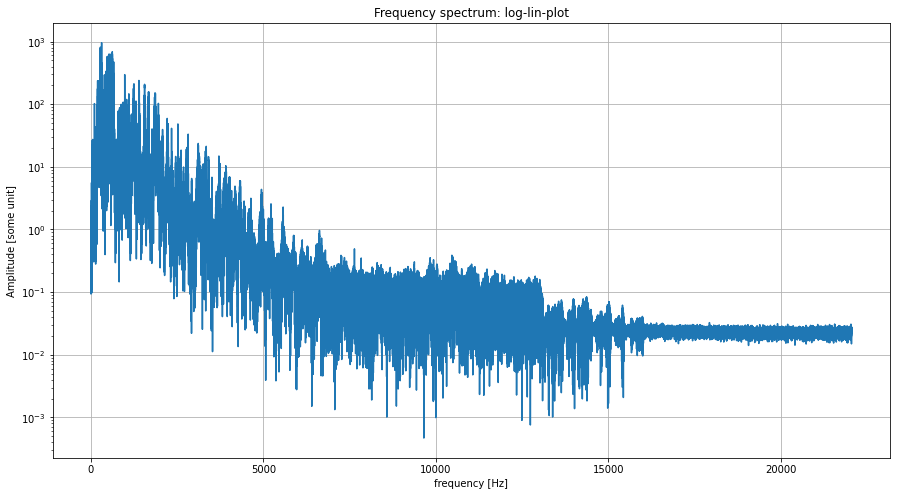

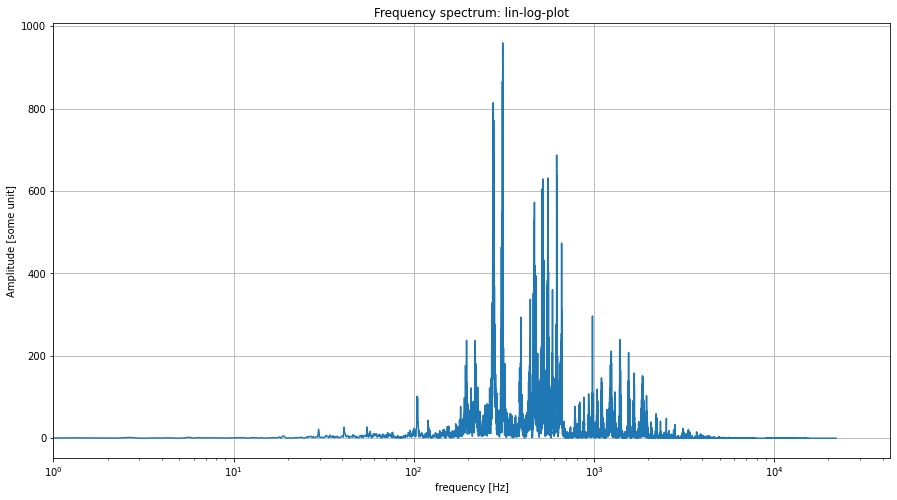

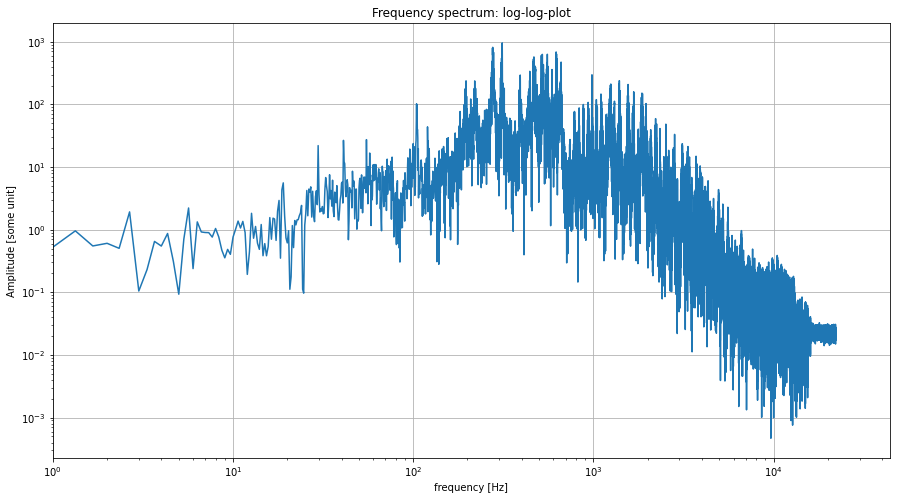

In [10]:
# Let's make some plots of the 'normal' (discrete) Fouriertransform 
# of an entire snippet
i=5
exampledata = data[i][0]
fft = scipy.fft.fft(exampledata)

N = len(exampledata)
Nhalf_min  = int(np.floor(N/2))
sr = sample_rates[i]
T = N/sr # Total time of signal

xf = np.linspace(0, sr * (Nhalf_min-1)/N, Nhalf_min )
yf = np.abs(fft[:Nhalf_min])

# lin-lin plot:
plt.figure(figsize=(15,8))
plt.plot(xf,yf)
plt.xlabel('frequency [Hz]')
plt.ylabel('Amplitude [some unit]')
plt.title('Frequency spectrum: lin-lin-plot')
plt.grid(True)
plt.xlim((0,4000))

# log-lin plot:
plt.figure(figsize=(15,8))
plt.plot(xf,yf)
plt.xlabel('frequency [Hz]')
plt.ylabel('Amplitude [some unit]')
plt.title('Frequency spectrum: log-lin-plot')
plt.grid(True)
plt.yscale('log')

# lin-log plot:
plt.figure(figsize=(15,8))
plt.plot(xf,yf)
plt.xlabel('frequency [Hz]')
plt.ylabel('Amplitude [some unit]')
plt.title('Frequency spectrum: lin-log-plot')
plt.grid(True)
plt.xlim((1,sr))
plt.xscale('log')

# log-log plot:
plt.figure(figsize=(15,8))
plt.plot(xf,yf)
plt.xlabel('frequency [Hz]')
plt.ylabel('Amplitude [some unit]')
plt.title('Frequency spectrum: log-log-plot')
plt.grid(True)
plt.xlim((1,sr))
plt.xscale('log')
plt.yscale('log')

## Spectogram

In [ ]:
np.abs( librosa.core.stft(exampledata) )

array([[6.21127188e-01, 2.44512409e-01, 1.04918957e-01, ...,
        1.28702328e-01, 1.08230636e-01, 3.25782686e-01],
       [5.72599053e-01, 3.92838269e-01, 1.70879766e-01, ...,
        3.88739258e-02, 1.04658179e-01, 4.12161738e-01],
       [3.62837136e-01, 1.82105482e-01, 1.29736871e-01, ...,
        2.74382681e-01, 6.26930237e-01, 1.15580523e+00],
       ...,
       [2.28798363e-05, 1.97085290e-04, 1.13547700e-04, ...,
        2.19768510e-04, 2.63019610e-04, 4.30335931e-04],
       [4.11195622e-04, 2.87285424e-04, 1.24415848e-04, ...,
        1.85328216e-04, 1.36992981e-04, 3.54947755e-04],
       [6.53478492e-04, 4.94702894e-04, 3.48780974e-04, ...,
        2.69878394e-04, 6.33867749e-05, 2.02781055e-04]], dtype=float32)

## Train a classifier